In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


df = pd.read_csv("../data/adult.csv")
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [17]:
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())

df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Missing values per column:
age               0
workclass         0
fnlwgt            0
educa

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education.num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital.status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.columns = df.columns.str.strip()
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [19]:
df.replace("?", np.nan, inplace=True)

print(df.isnull().sum())

df.dropna(inplace=True)

print("Shape after cleaning:", df.shape)


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64
Shape after cleaning: (30162, 15)


In [20]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

num_cols = df.select_dtypes(include=['int64', 'float64'])

corr = num_cols.corr()

print(corr['income'].sort_values(ascending=False))


income            1.000000
education.num     0.335286
age               0.241998
hours.per.week    0.229480
capital.gain      0.221196
capital.loss      0.150053
fnlwgt           -0.008957
Name: income, dtype: float64


In [64]:
if 'fnlwgt' in df.columns:
    df = df.drop('fnlwgt', axis=1)

df.head()


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

categorical_features = ['workclass', 'education', 'marital.status', 'occupation',
                        'relationship', 'race', 'sex', 'native.country']
numerical_features = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [73]:
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (24129, 13)
Test shape: (6033, 13)


In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_features = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
cat_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)


In [75]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000))
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)


In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.8536383225592574
[[4221  310]
 [ 573  929]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4531
           1       0.75      0.62      0.68      1502

    accuracy                           0.85      6033
   macro avg       0.82      0.78      0.79      6033
weighted avg       0.85      0.85      0.85      6033



In [77]:
from sklearn.linear_model import LogisticRegression

lr_balanced = LogisticRegression(
    max_iter=3000,
    C=0.1,  # use same best param
    solver='liblinear',
    class_weight='balanced'
)

lr_balanced.fit(X_train_scaled, y_train)
y_pred_lr_bal = lr_balanced.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Balanced LR Accuracy:", accuracy_score(y_test, y_pred_lr_bal))
print(confusion_matrix(y_test, y_pred_lr_bal))
print(classification_report(y_test, y_pred_lr_bal))


Balanced LR Accuracy: 0.817503729487817
[[3651  880]
 [ 221 1281]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      4531
           1       0.59      0.85      0.70      1502

    accuracy                           0.82      6033
   macro avg       0.77      0.83      0.78      6033
weighted avg       0.86      0.82      0.83      6033



In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10]
}

dt = DecisionTreeClassifier(random_state=42)

grid_dt = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train_scaled, y_train)

print("Best Decision Tree Params:", grid_dt.best_params_)
print("Best Decision Tree Score (CV):", grid_dt.best_score_)

best_dt_model = grid_dt.best_estimator_
y_pred_dt_tuned = best_dt_model.predict(X_test_scaled)

print("Tuned DT Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))
print(confusion_matrix(y_test, y_pred_dt_tuned))
print(classification_report(y_test, y_pred_dt_tuned))


Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best Decision Tree Score (CV): 0.8480253291218336
Tuned DT Accuracy: 0.856124647770595
[[4326  205]
 [ 663  839]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4531
           1       0.80      0.56      0.66      1502

    accuracy                           0.86      6033
   macro avg       0.84      0.76      0.78      6033
weighted avg       0.85      0.86      0.85      6033



In [80]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

categorical_features = ['workclass', 'education', 'marital.status', 'occupation',
                        'relationship', 'race', 'sex', 'native.country']
numerical_features = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

rf = RandomForestClassifier(random_state=42)

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

rf_params = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__class_weight': ['balanced']
}

grid_rf = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF Score (CV):", grid_rf.best_score_)

best_rf_model = grid_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Best RF Params: {'classifier__class_weight': 'balanced', 'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best RF Score (CV): 0.8418500222241786
Random Forest Accuracy: 0.8562904027846843
[[4066  465]
 [ 402 1100]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4531
           1       0.70      0.73      0.72      1502

    accuracy                           0.86      6033
   macro avg       0.81      0.81      0.81      6033
weighted avg       0.86      0.86      0.86      6033



In [81]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgb_model = XGBClassifier(
    eval_metric='logloss',
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb_pipeline = xgb_pipeline.predict(X_test)

print("XGBoost (Pipeline) Accuracy:", accuracy_score(y_test, y_pred_xgb_pipeline))
print(confusion_matrix(y_test, y_pred_xgb_pipeline))
print(classification_report(y_test, y_pred_xgb_pipeline))


XGBoost (Pipeline) Accuracy: 0.8761810044753854
[[4294  237]
 [ 510  992]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4531
           1       0.81      0.66      0.73      1502

    accuracy                           0.88      6033
   macro avg       0.85      0.80      0.82      6033
weighted avg       0.87      0.88      0.87      6033



In [82]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5],
    'scale_pos_weight': [1, 2, 3]  # to balance the class
}


In [85]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

xgb_clf = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__subsample': [0.5, 0.7, 1.0],
    'classifier__colsample_bytree': [0.5, 0.7, 1.0],
    'classifier__gamma': [0, 1, 5],
}

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_clf)
])

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_final = random_search.predict(X_test)
print("Tuned Pipeline XGBoost Accuracy:", accuracy_score(y_test, y_pred_final))
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Tuned Pipeline XGBoost Accuracy: 0.8755179844190287
[[4277  254]
 [ 497 1005]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4531
           1       0.80      0.67      0.73      1502

    accuracy                           0.88      6033
   macro avg       0.85      0.81      0.82      6033
weighted avg       0.87      0.88      0.87      6033



In [41]:
print("Best XGBoost Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

best_xgb = random_search.best_estimator_
y_pred_tuned = best_xgb.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_tuned))
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))


Best XGBoost Parameters: {'subsample': 1.0, 'scale_pos_weight': 1, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best CV Score: 0.8672137262215592
Tuned XGBoost Accuracy: 0.8740261892922261
[[4273  258]
 [ 502 1000]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4531
           1       0.79      0.67      0.72      1502

    accuracy                           0.87      6033
   macro avg       0.84      0.80      0.82      6033
weighted avg       0.87      0.87      0.87      6033



In [63]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Use your best params (copied from RandomizedSearchCV results)
best_params = {
    'subsample': 1.0,
    'scale_pos_weight': 1,
    'n_estimators': 500,
    'min_child_weight': 5,
    'max_depth': 7,
    'learning_rate': 0.2,
    'gamma': 0.1,
    'colsample_bytree': 0.8,
    'eval_metric': 'logloss',
    'random_state': 42
}

# Build pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # From cell 26
    ('classifier', XGBClassifier(**best_params))
])

# Fit pipeline
xgb_pipeline.fit(X_train, y_train)

# Predict
y_pred_pipeline = xgb_pipeline.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Pipeline XGBoost Accuracy:", accuracy_score(y_test, y_pred_pipeline))
print(confusion_matrix(y_test, y_pred_pipeline))
print(classification_report(y_test, y_pred_pipeline))


ValueError: A given column is not a column of the dataframe

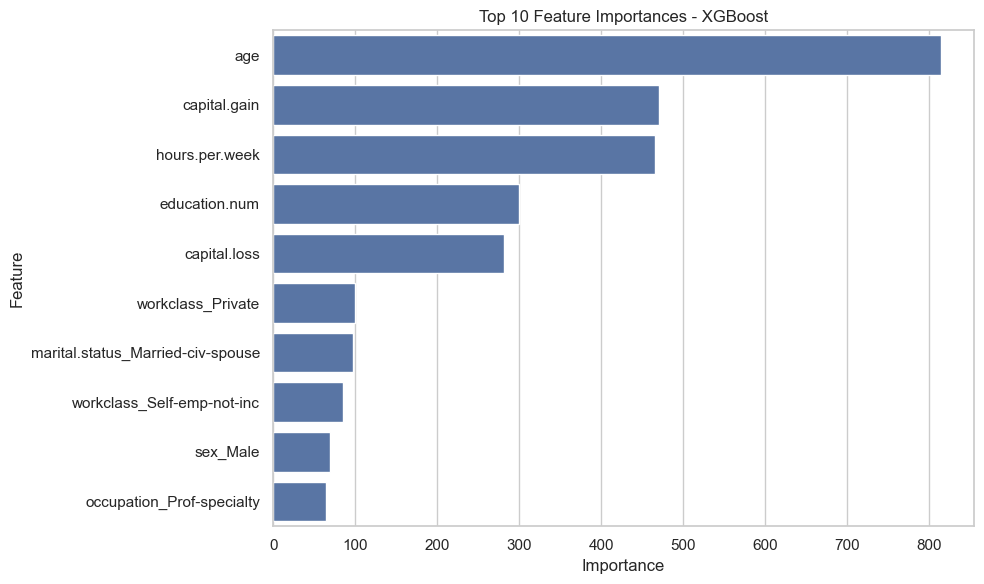

In [44]:
feature_names = X.columns  

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import plot_importance

importances = xgb.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': [feature_names[int(f[1:])] for f in importances.keys()],
    'Importance': list(importances.values())
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Feature Importances - XGBoost")
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

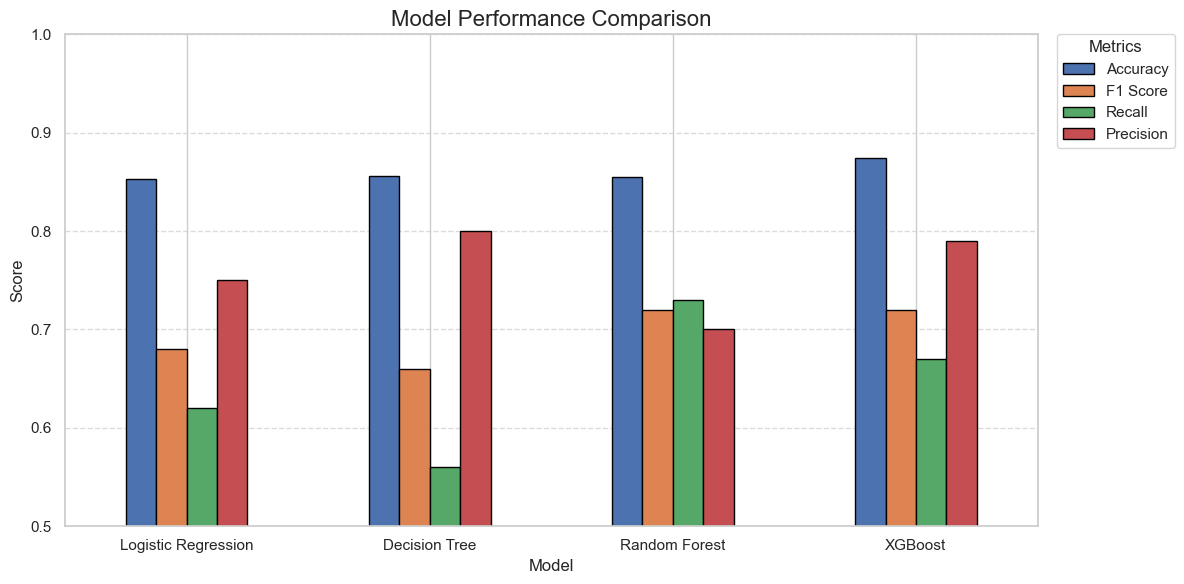

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"]
accuracies = [0.853, 0.856, 0.855, 0.874]
f1_scores = [0.68, 0.66, 0.72, 0.72]
recalls = [0.62, 0.56, 0.73, 0.67]
precisions = [0.75, 0.80, 0.70, 0.79]

metrics_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "F1 Score": f1_scores,
    "Recall": recalls,
    "Precision": precisions
})
plt.figure(figsize=(12, 6))
metrics_df.set_index("Model").plot(kind="bar", figsize=(12, 6), edgecolor="black")

plt.title("Model Performance Comparison", fontsize=16)
plt.ylim(0.5, 1.0)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(
    loc='upper left', 
    bbox_to_anchor=(1.02, 1), 
    borderaxespad=0,
    title='Metrics', 
    title_fontsize=12, 
    fontsize=11
)

plt.tight_layout()
plt.show()


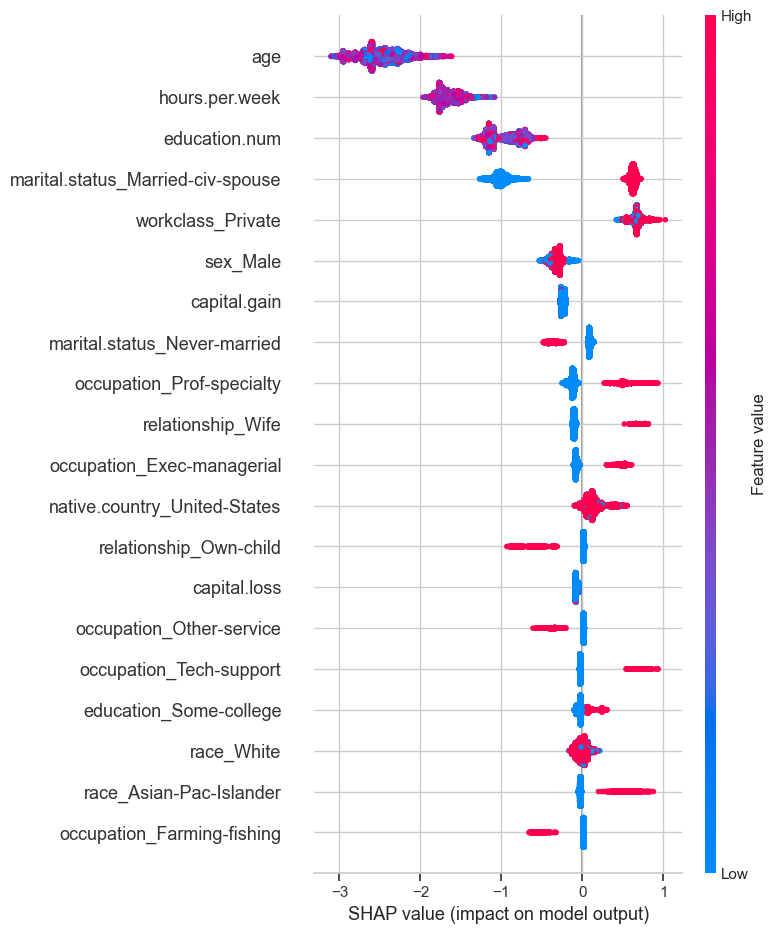

In [49]:
import shap

explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_train_scaled)

shap.summary_plot(shap_values, X_train_scaled, feature_names=X.columns)


In [50]:
import joblib

joblib.dump(best_xgb, "xgboost_best_model.pkl")


['xgboost_best_model.pkl']

In [51]:
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)


In [52]:
df.head()


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [55]:
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Categorical columns:", X[categorical_features].nunique())


Features shape: (30162, 12)
Target shape: (30162,)
Categorical columns: workclass          7
marital.status     7
occupation        14
relationship       6
race               5
sex                2
native.country    41
dtype: int64


In [54]:
X = df[selected_features]
y = df[target]  


In [53]:
numerical_features = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
categorical_features = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

selected_features = numerical_features + categorical_features

target = 'income'


In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [59]:
print(X_train.columns)


Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'oc

In [ ]:
X = df_cleaned.drop('income', axis=1)
y = df_cleaned['income']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
